## Метрики моделей классификации 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris


print("версия pandas:", pd.__version__)
print("версия sklearn:", sklearn.__version__)



версия pandas: 2.2.2
версия sklearn: 1.5.1


In [6]:
iris_dataset=load_iris()
iris_dataset
print("Ключи load_dataset:\n", iris_dataset.keys())

Ключи load_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
print("Ключи feature_names:\n", iris_dataset['feature_names'])
print("Ключи data:\n", iris_dataset['data'])

Ключи feature_names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Ключи data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.

In [14]:
print("Ключи feature_names:\n", iris_dataset['target'])
print("Ключи data:\n", iris_dataset['target_names'])

Ключи feature_names:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Ключи data:
 ['setosa' 'versicolor' 'virginica']


In [16]:
iris_df=pd.DataFrame(iris_dataset['data'],columns=iris_dataset.feature_names)
display(iris_df.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
dict_class=dict(zip(range(3),iris_dataset['target_names']))
df_full=pd.concat([pd.DataFrame(iris_dataset['target'],columns=['class']), 
                   iris_df], axis=1).replace({'class': dict_class})
df_full.tail()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3
149,virginica,5.9,3.0,5.1,1.8


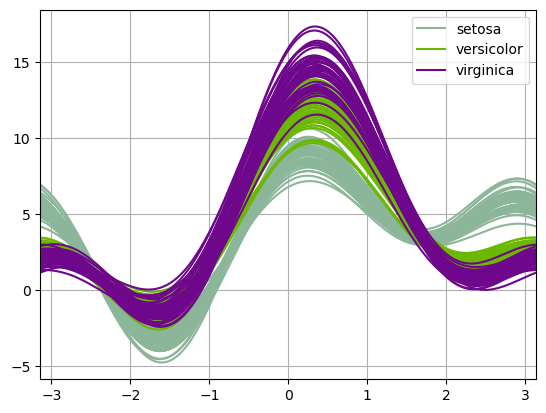

In [20]:
pd_plt.andrews_curves(df_full, 'class')
plt.show()

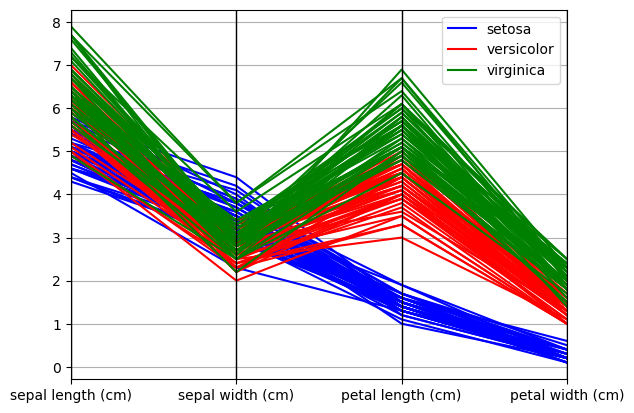

In [22]:
pd_plt.parallel_coordinates(df_full, 'class',colormap=plt_colors.ListedColormap(['blue','red', 'green']))
plt.show()

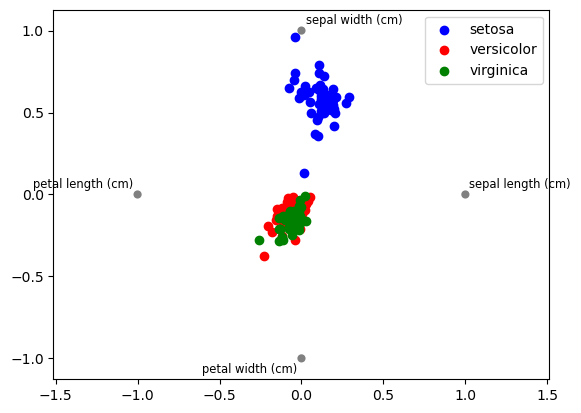

In [24]:
pd_plt.radviz(df_full, 'class', colormap=plt_colors.ListedColormap(['blue','red', 'green']))
plt.show()

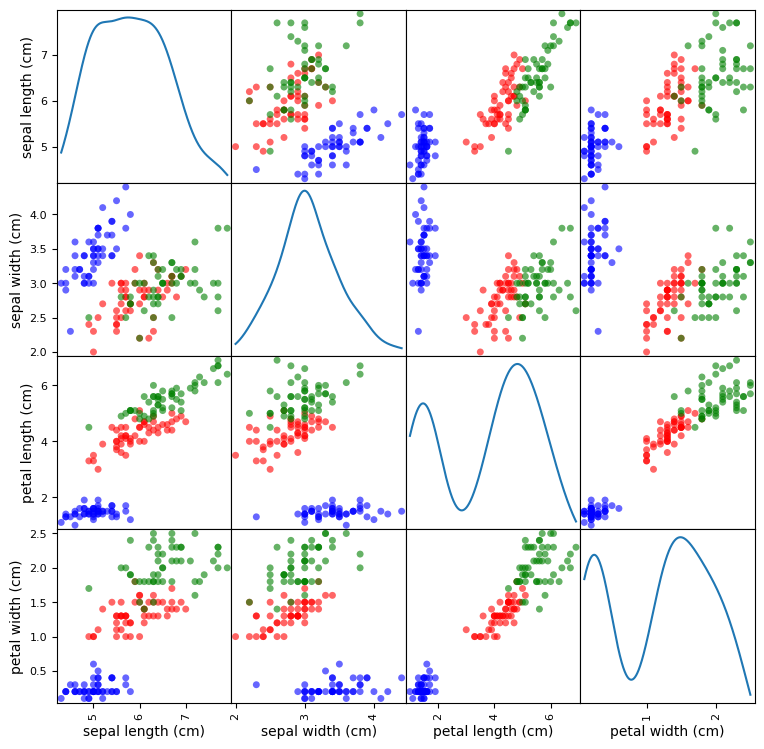

In [38]:
pd_plt.scatter_matrix(df_full,  #данные 
                     c=pd.factorize(df_full['class'])[0], # разделение по цветам
                     alpha=0.6, # прозрачность
                     s=100, # размер точек
                     figsize=(9, 9), # размер окна
                     diagonal='kde', # что на диагонали плотность  kde или hist  
                     #hist_kwds={'bins': 20}, # гистограмма настраиваемая диаграмма на диагонале
                     cmap=plt_colors.ListedColormap(['blue','red', 'green'])# список цветов
                    )
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=12)

In [30]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)

X_train (112, 4)
y_train (112,)


In [32]:
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_test (38, 4)
y_test (38,)


In [34]:
y_train

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0,
       1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2,
       2, 1])

In [36]:
y_test

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

### Предсказание

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=22)

knk = KNeighborsClassifier()
knk.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred=knk.predict(X_test)
print('Правильность на тестовом наборе: {:.3f}'.format(np.mean(y_pred==y_test)))

Правильность на тестовом наборе: 0.974


In [21]:
knk_train=knk.score(X_train , y_train)
knk_test=knk.score(X_test , y_test)
print("тренировочный: {:.3f}".format(knk_train))
print("тестовый: {:.3f}".format(knk_test))

тренировочный: 0.973
тестовый: 0.974


### Кросс-валидация

In [23]:
from sklearn.model_selection import cross_val_score 


knk = KNeighborsClassifier()
cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=5)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)


Значения правильности перекрестной проверки: [0.9667 1.     0.9333 0.9667 1.    ]


In [24]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold


knk = KNeighborsClassifier()
split = KFold(n_splits=3)
cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=split)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)

Значения правильности перекрестной проверки: [0. 0. 0.]


In [25]:
from sklearn.model_selection import ShuffleSplit

knk = KNeighborsClassifier()
shuffle_split = ShuffleSplit(test_size=.3, train_size=.6, n_splits=3, random_state=12)

cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=shuffle_split)

np.set_printoptions(precision=4)
print("Значения правильности перекрестной проверки:",cross_vall)

Значения правильности перекрестной проверки: [0.9778 0.9556 0.9778]


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

for n_neighbors in [1,5,10,15,20]:
    knk = KNeighborsClassifier(n_neighbors=n_neighbors)
    strat_shuffle_split = StratifiedShuffleSplit(test_size=.3, train_size=.6, n_splits=10, random_state=12)

    cross_vall = cross_val_score(knk, iris_dataset.data, iris_dataset.target, cv=strat_shuffle_split)

    np.set_printoptions(precision=4)
    print("________________")
    print("n=",n_neighbors)
    print("Значения правильности перекрестной проверки:",cross_vall)
    print("Среднее:",np.mean(cross_vall))
    print("Средняя квадоатическая ощибка (MSE):",np.std(cross_vall))

________________
n= 1
Значения правильности перекрестной проверки: [0.9111 0.9778 0.9556 0.9778 0.9778 0.9778 0.9556 0.9778 0.9556 0.8889]
Среднее: 0.9555555555555555
Средняя квадоатическая ощибка (MSE): 0.0298142396999972
________________
n= 5
Значения правильности перекрестной проверки: [0.9333 0.9778 0.9556 0.9778 0.9778 0.9778 0.9778 0.9556 0.9778 0.9556]
Среднее: 0.9666666666666666
Средняя квадоатическая ощибка (MSE): 0.01490711984999857
________________
n= 10
Значения правильности перекрестной проверки: [0.9556 0.9778 0.9333 1.     0.9778 0.9778 0.9778 0.9556 0.9556 0.9333]
Среднее: 0.9644444444444444
Средняя квадоатическая ощибка (MSE): 0.020367003088692603
________________
n= 15
Значения правильности перекрестной проверки: [0.9333 0.9778 0.9111 0.9778 0.9778 0.9778 0.9778 0.9556 0.9333 0.9556]
Среднее: 0.9577777777777777
Средняя квадоатическая ощибка (MSE): 0.02320068113091232
________________
n= 20
Значения правильности перекрестной проверки: [0.8889 0.9556 0.9111 0.9778 0.977

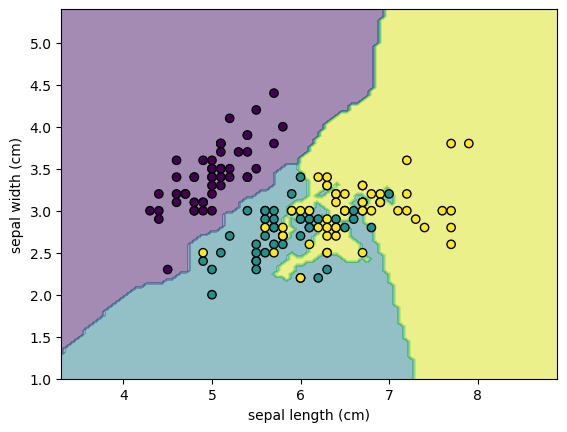

In [27]:
### Реализуется ТОЛЬКО для двухмерных данных !!!




from sklearn.inspection import DecisionBoundaryDisplay

iris = load_iris()
X = iris.data[:,:2]

classifier = KNeighborsClassifier(n_neighbors = 3).fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X[:,:2], response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

plt.show()

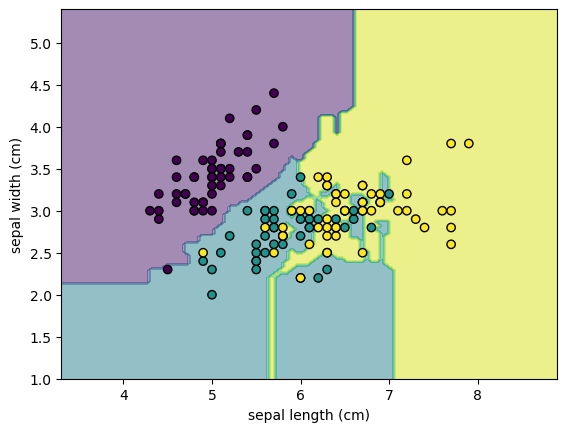

In [28]:
classifier = KNeighborsClassifier(n_neighbors = 3, p = 1).fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X[:,:2], response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs

X, y = np.array([[1,0],[0,1]]),np.array([0, 1])
#X, y = make_blobs(n_samples=100, n_features=2, centers=2) 


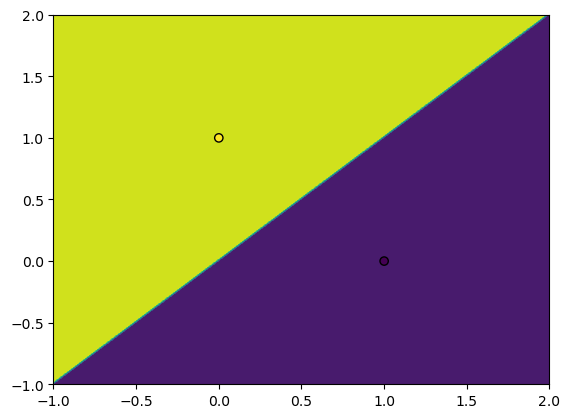

In [30]:
classifier = KNeighborsClassifier(n_neighbors=1).fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")


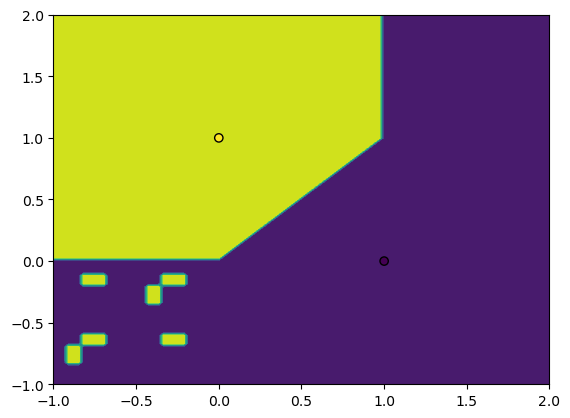

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 1, p = 1).fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict"
    
    )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k");